In [34]:
import re
import matplotlib.pyplot as plt


In [35]:
plt.rcParams["figure.figsize"] = (10,5)

In [73]:
def parse_log(log):
    parsed_log = []

    d = {}
    for l in log.split('\n'):
        m = re.match('.*After (.*) nodes, (.*) on tree, (.*) best solution, best possible (.*) \((.*) seconds\)', l)
        if m:
            parsed_log.append(m.groups())
        m = re.match('args: (.*)', l)
        if m:
            d['title'] = l

    for idx, name in enumerate(["nodes", "tree", "best_solution", "best_possible", "seconds"]):
        d[name] = [float(x[idx]) for x in parsed_log]
        d[name] = [x if x < 9999999 else None for x in d[name]]
        
    return d

In [116]:
def plot_log(d):
    plt.title(d['title'])
    line, = plt.plot(d["seconds"], d["best_solution"], marker = 'x', label='best solution (incumbent)',
                    color=u'#ff7f0e')
    plt.plot(d["seconds"], d["best_possible"], linestyle='--', label='best possible (bound)', color=line.get_color())
    plt.legend()
    plt.show()

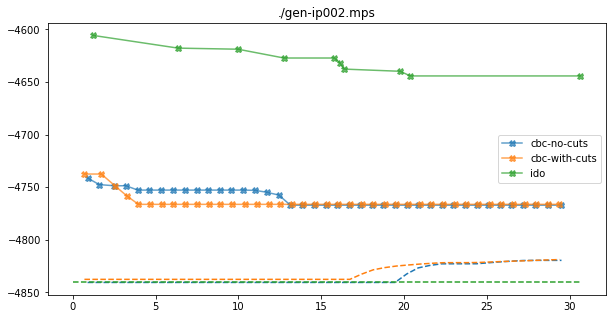

In [117]:
dd = {'cbc-no-cuts': parse_log(open('0530160356.log').read()),
     'cbc-with-cuts': parse_log(open('0530181429.log').read()),
      'ido': parse_log(open('0530234107.log').read()),
     }
for k, d in dd.items():
    plt.title(eval(d['title'][5:])['file'])
    line, = plt.plot(d["seconds"], d["best_solution"], marker='X', label=k, alpha=0.7)
    plt.plot(d["seconds"], d["best_possible"], linestyle='--', color=line.get_color())
plt.legend()
plt.show()    

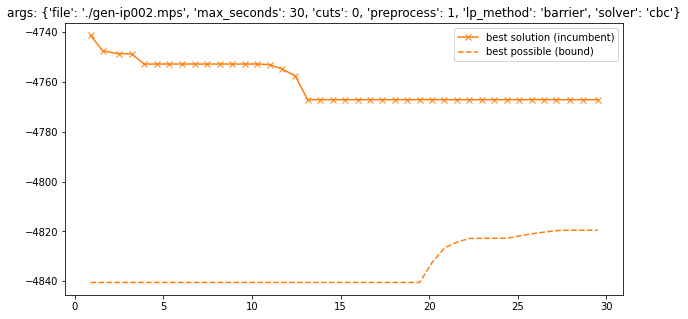

In [118]:
plot_log(parse_log(open('0530160356.log').read()))

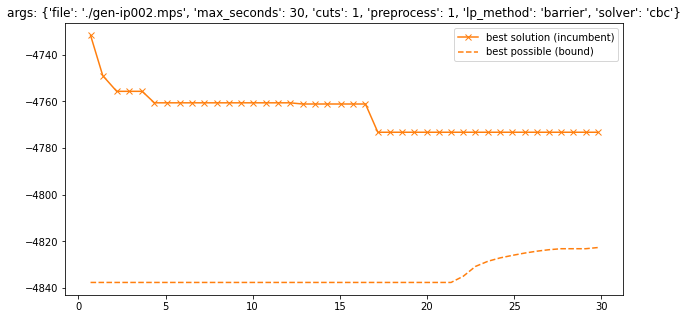

In [119]:
plot_log(parse_log(open('0530160526.log').read()))

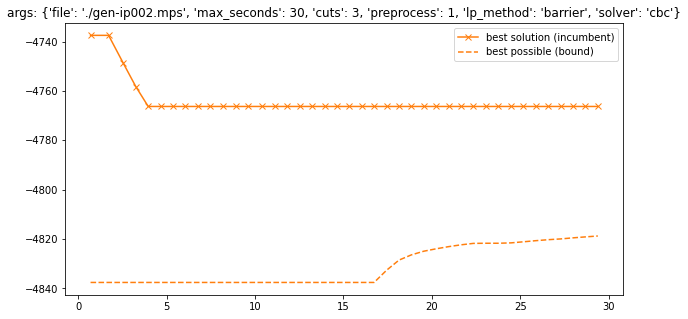

In [120]:
plot_log(parse_log(open('0530181429.log').read()))

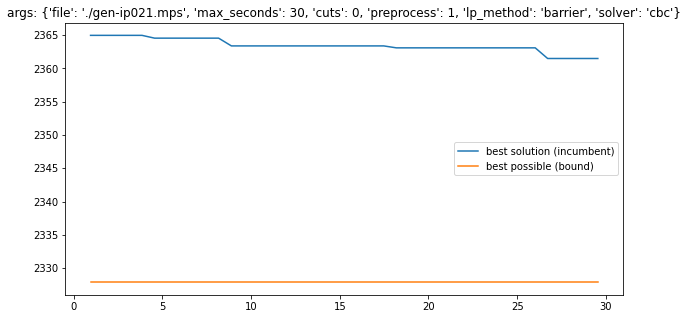

In [81]:
plot_log(parse_log(open('0530160714.log').read()))

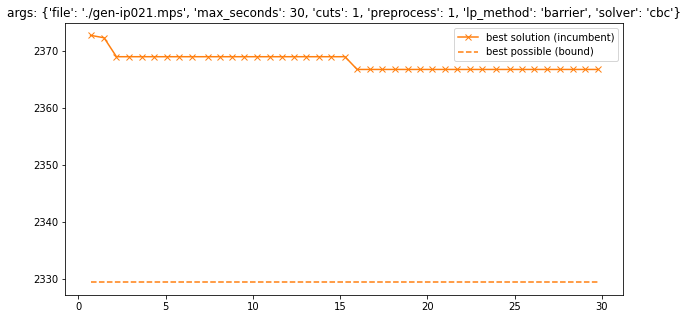

In [121]:
plot_log(parse_log(open('0530160806.log').read()))

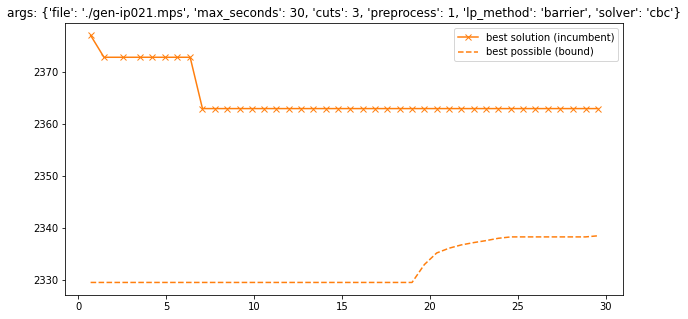

In [122]:
plot_log(parse_log(open('0530181157.log').read()))

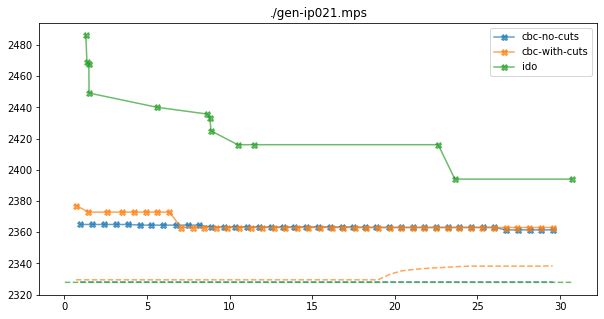

In [112]:
dd = {'cbc-no-cuts': parse_log(open('0530160714.log').read()),
     'cbc-with-cuts': parse_log(open('0530181157.log').read()),
      'ido': parse_log(open('0530234655.log').read()),
     }
for k, d in dd.items():
    plt.title(eval(d['title'][5:])['file'])
    line, = plt.plot(d["seconds"], d["best_solution"], marker='X', label=k, alpha=0.7)
    plt.plot(d["seconds"], d["best_possible"], linestyle='--', color=line.get_color(), alpha=0.7)
plt.legend()
plt.show()    